# Análisis Exploratorio y Clasificación del Titanic

## Objetivos del Proyecto

Este proyecto se compone de tres objetivos principales:

1. **Análisis Exploratorio de Datos (EDA)**:
   - Realizar un análisis exploratorio para extraer información significativa de los datos.
   - Identificar las mejores características (features) que se utilizarán para el modelado.

2. **Entrenamiento, Prueba y Refinamiento de Modelos de Clasificación**:
   - Entrenar, probar y refinar varios modelos de clasificación para predecir con mayor precisión qué pasajeros sobrevivieron. Los algoritmos predictivos que se entrenarán son:
     - **Regresión Logística**
     - **K-Vecinos Más Cercanos (KNN)**

3. **Aplicación del Mejor Modelo**:
   - Aplicar el modelo con el mejor rendimiento al conjunto de prueba para la presentación del concurso.

## Descripción de los Algoritmos Utilizados

### Regresión Logística
Un modelo estadístico que se utiliza para predecir el resultado de una variable dependiente categórica basada en una o más variables independientes.

### K-Vecinos Más Cercanos (KNN)
Un algoritmo en el que la clasificación de una muestra se basa en la mayoría de los votos de sus K vecinos más cercanos en el espacio de características.


In [38]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings

In [39]:
warnings.filterwarnings('ignore') # Ignore warning messages
plt.rcParams["figure.figsize"] = [10,5] # Set the size of the figures

In [40]:
train_data = pd.read_csv('/Users/mdurango/University/MLProyect/dataset/train.csv')

# Descripción de las Features del Dataset del Titanic

| **Variable**     | **Descripción**                                                                                       |
|------------------|-------------------------------------------------------------------------------------------------------|
| **PassengerId**  | Esta columna contiene un identificador único para cada pasajero.                                     |
| **Survived**     | Esta columna indica si un pasajero sobrevivió al hundimiento o no. Valor 0 = no sobrevivió, 1 = sobrevivió. |
| **Pclass**       | Esta columna contiene información sobre la clase del pasajero. Valor 1 = primera clase, 2 = segunda clase, 3 = tercera clase. |
| **Name**         | Esta columna presenta el nombre del pasajero.                                                        |
| **Sex**          | Esta columna contiene información sobre el género del pasajero.                                       |
| **Age**          | Esta columna muestra la edad del pasajero.                                                           |
| **SibSp**        | Esta columna proporciona información sobre los hermanos y cónyuges del pasajero.                      |
| **Parch**        | Esta columna ofrece información sobre los padres e hijos del pasajero.                                |
| **Ticket**       | Esta columna contiene el número de ticket del pasajero.                                              |
| **Fare**         | Esta columna muestra la tarifa pagada por el pasajero.                                               |
| **Cabin**        | Esta columna contiene el número de la cabina del pasajero.                                           |
| **Embarked**     | Esta columna indica el puerto de embarque. Valor C = Cherburgo, Q = Queenstown, S = Southampton.    |

In [41]:
print('train data:',train_data.shape)

train data: (891, 12)


In [42]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


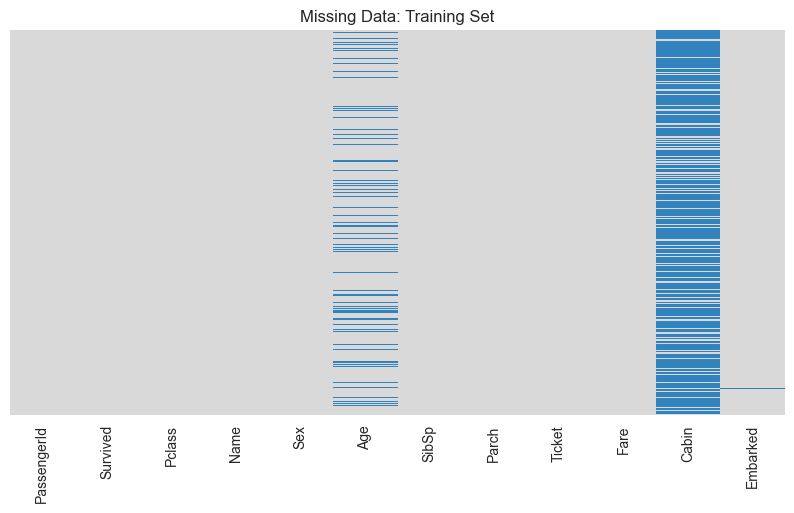

In [43]:
# Heatmap
sns.heatmap(train_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

**nota:** La variable 'Age' tiene aproximadamente un 20% de sus datos faltantes. Esta proporción probablemente sea lo suficientemente pequeña como para permitir reemplazos razonables utilizando alguna forma de imputación (usando el conocimiento de las otras columnas para llenar valores razonables). Sin embargo, falta demasiada información en la columna 'Cabin' para hacer algo útil con ella a un nivel básico. Esta columna puede necesitar ser eliminada del conjunto de datos por completo o cambiarse por otra característica, como 'Cabina Conocida: 1 o 0'.

Queremos completar los datos faltantes de edad en lugar de simplemente eliminar las filas con datos faltantes de edad. Una forma de hacerlo es rellenando con la edad promedio de todos los pasajeros (imputación). Sin embargo, podemos ser más inteligentes acerca de esto y verificar la edad promedio según la clase del pasajero.

In [44]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

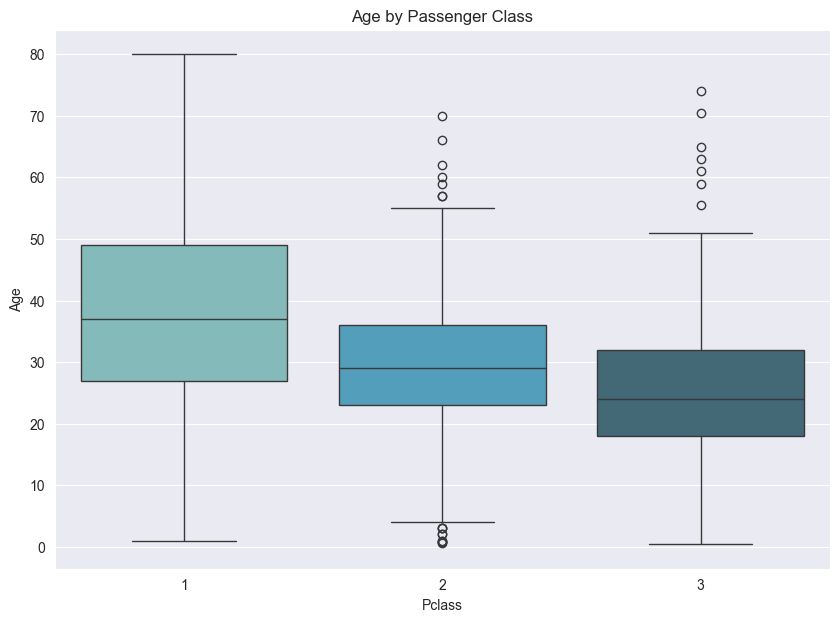

In [45]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train_data, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

In [46]:
def impute_age(cols):
    """This function imputes the missing values of the Age column based on the values of the Pclass column.

    Parameters:
     - cols: list of columns

    Returns:
        - Age: int

    """
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
train_data['Age']=train_data[['Age','Pclass']].apply(impute_age, axis=1)

In [47]:
train_data.drop('Cabin', axis = 1, inplace = True) # Drop the Cabin column for the hight number of missing values
train_data.drop('PassengerId', inplace = True, axis = 1) # Drop the PassengerId column because it is not relevant for the analysis

In [48]:
train_data.dropna(inplace = True) # Drop the rows with missing values

In [49]:
print(train_data.info())

# Identify non-null objects
print('\n')
print('Non-Null Objects to Be Converted to Category')
print(train_data.select_dtypes(['object']).columns)

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB
None


Non-Null Objects to Be Converted to Category
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


El nombre (Name) y el ticket (Ticket) pueden ser eliminados del conjunto de datos, ya que estas características no proporcionan información adicional sobre la probabilidad de supervivencia de un pasajero.

Los demás objetos no nulos, como el sexo (Sex) y el puerto de embarque (Embarked), deberán ser especificados como categorías para obtener mejores resultados en análisis posteriores.

In [50]:
# Remove unnecessary columns
train_data.drop(['Name','Ticket'], axis = 1, inplace = True)

# Convert objects to category data type
objcat = ['Sex','Embarked']

for colname in objcat:
    train_data[colname] = train_data[colname].astype('category')

In [51]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,29.019314,13.209814,0.42,22.0000,26.0000,36.5,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


__________
## Paso 1: comprender el problema y definir el objetivo

Survived' es nuestro objetivo, ya que es la variable dependiente que estamos tratando de predecir.



In [52]:
dff = pd.melt(train_data, value_vars=['Survived', 'Sex'])

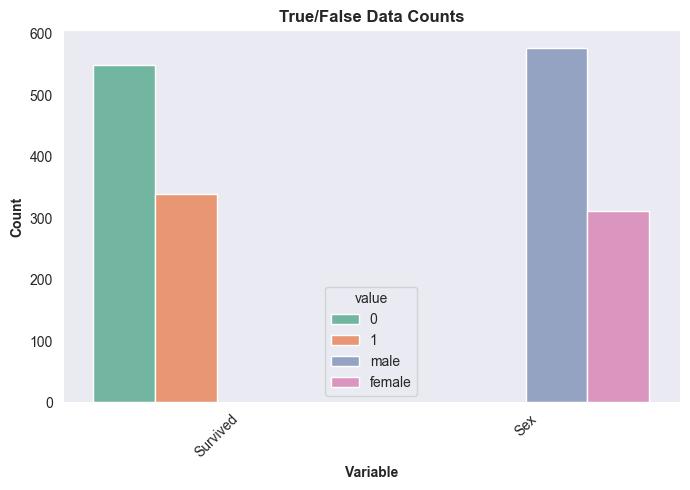

In [53]:
plt.figure(figsize=(7, 5))
cmap = sns.color_palette('Set2')

ax = sns.countplot(data=dff, x='variable', hue='value', palette=cmap)
ax.yaxis.grid()
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Variable', weight='bold')
ax.set_title('True/False Data Counts', weight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

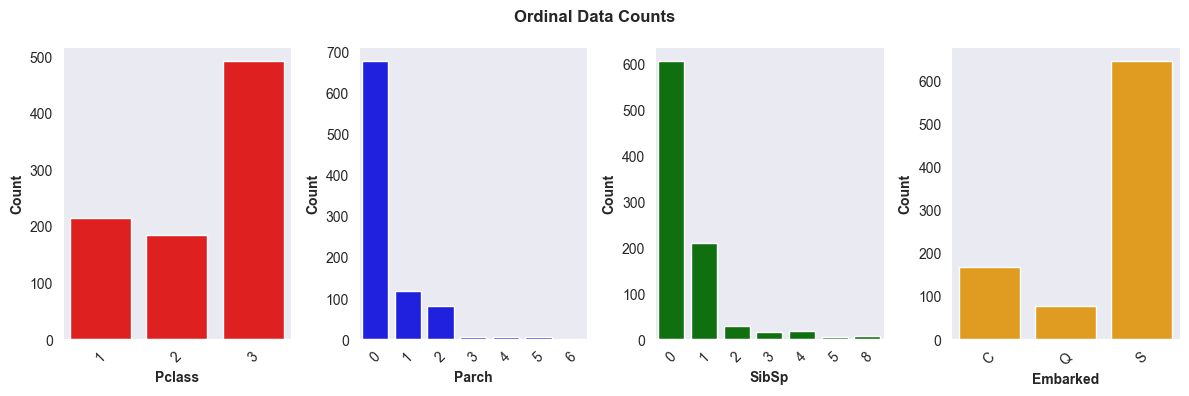

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4))

crs = ['red', 'blue', 'green', 'orange', 'purple']
for i, cc in enumerate(['Pclass', 'Parch', 'SibSp', 'Embarked']):
    ax = sns.countplot(data=train_data, x=cc, ax=axs[i], color=crs[i])
    ax.yaxis.grid()
    ax.set_xlabel(cc, weight='bold')
    ax.set_ylabel('Count', weight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.suptitle('Ordinal Data Counts', weight='bold')
fig.tight_layout()
plt.show()

Continuous Variables
      count       mean        std   min      25%      50%   75%       max
Age   889.0  29.019314  13.209814  0.42  22.0000  26.0000  36.5   80.0000
Fare  889.0  32.096681  49.697504  0.00   7.8958  14.4542  31.0  512.3292
--------------------------------------------------------------------------------
Discrete Variables
Pclass
1    214
2    184
3    491
Name: Pclass, dtype: int64
SibSp
0    606
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
Parch
0    676
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


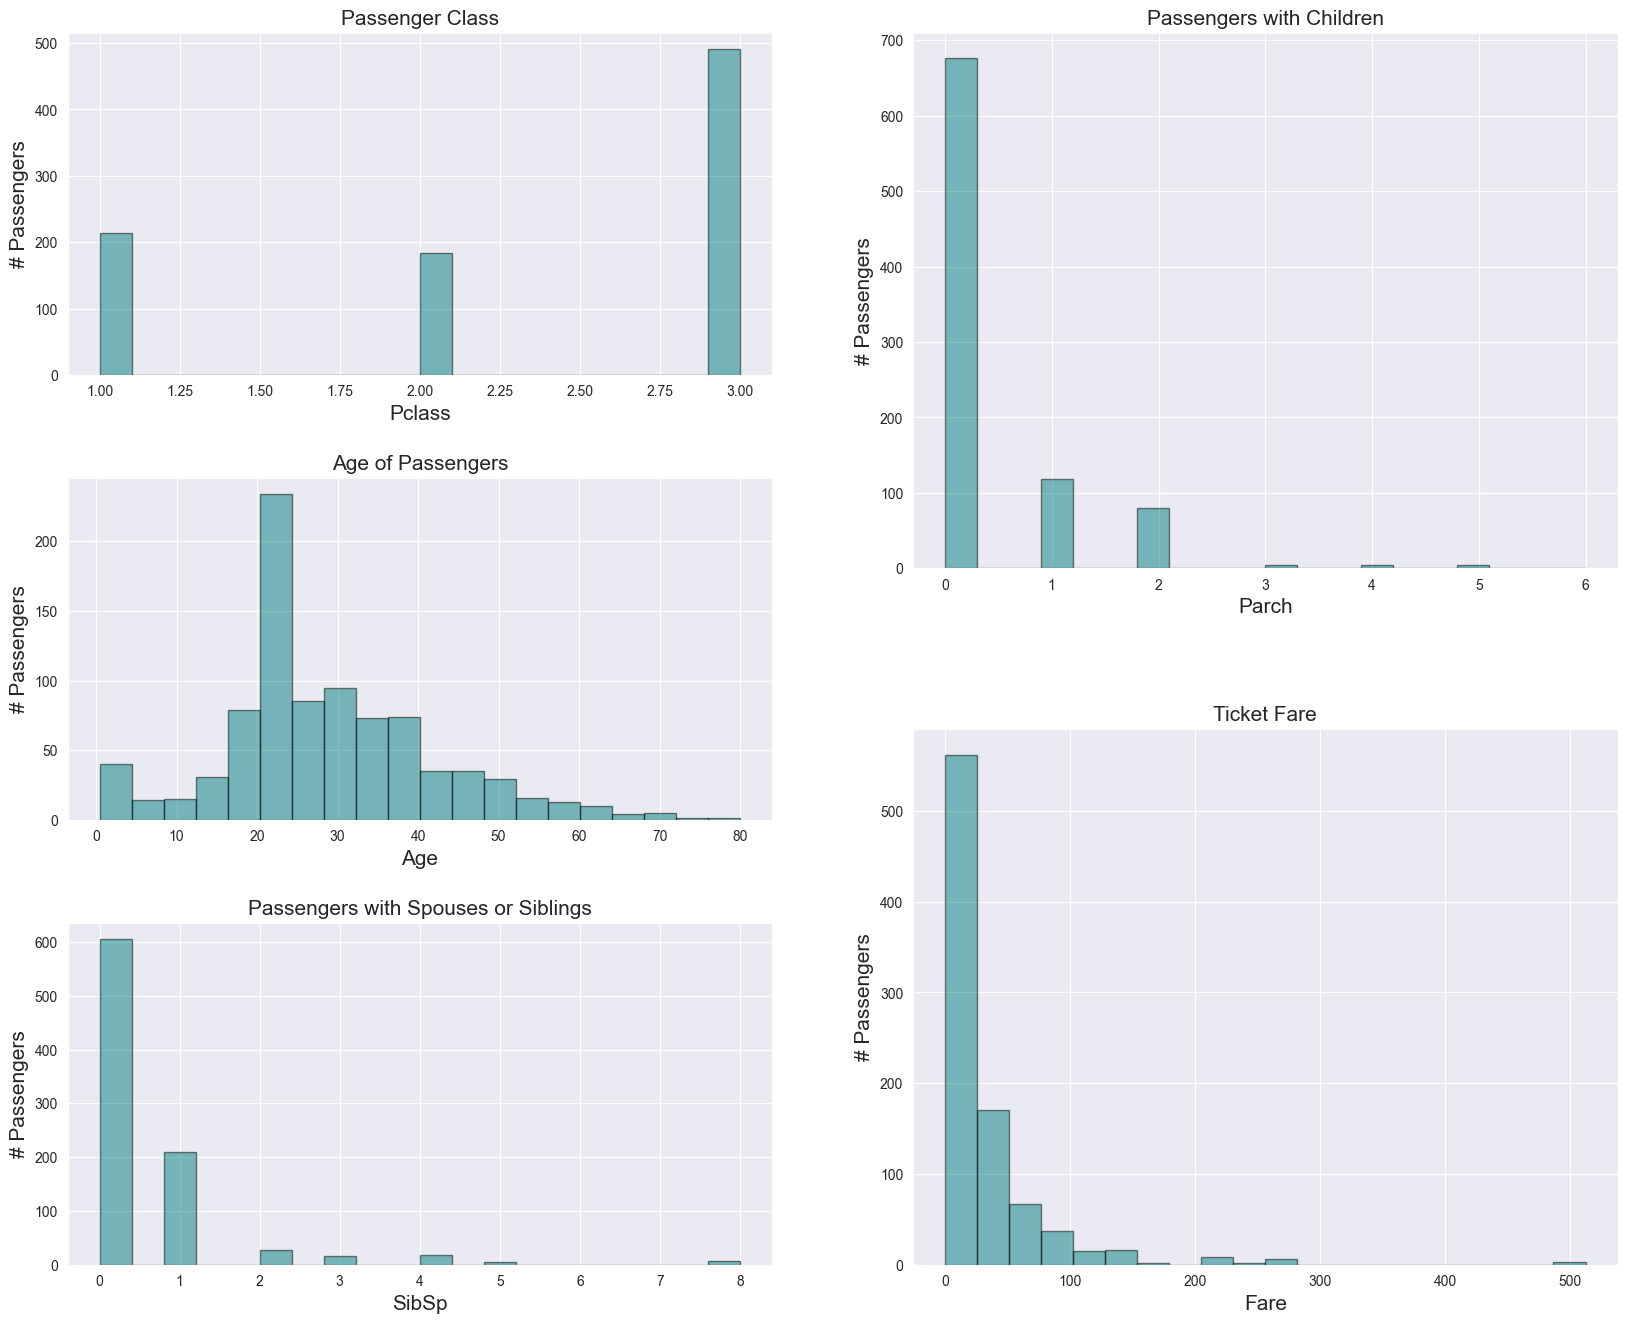

In [55]:
# Identify numeric features
print('Continuous Variables')
print(train_data[['Age','Fare']].describe().transpose())
print('--'*40)
print('Discrete Variables')
print(train_data.groupby('Pclass').Pclass.count())
print(train_data.groupby('SibSp').SibSp.count())
print(train_data.groupby('Parch').Parch.count())

# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(train_data['Pclass'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Pclass', fontsize = 15)
ax1.set_ylabel('# Passengers',fontsize = 15)
ax1.set_title('Passenger Class',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(train_data['Age'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Age',fontsize = 15)
ax2.set_ylabel('# Passengers',fontsize = 15)
ax2.set_title('Age of Passengers',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(train_data['SibSp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('SibSp',fontsize = 15)
ax3.set_ylabel('# Passengers',fontsize = 15)
ax3.set_title('Passengers with Spouses or Siblings',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(train_data['Parch'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Parch',fontsize = 15)
ax4.set_ylabel('# Passengers',fontsize = 15)
ax4.set_title('Passengers with Children',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(train_data['Fare'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Fare',fontsize = 15)
ax5.set_ylabel('# Passengers',fontsize = 15)
ax5.set_title('Ticket Fare',fontsize = 15)

plt.show()

* Insights de Características Numéricas: 

La mayoría de los pasajeros a bordo eran de tercera clase.
La mayoría eran viajeros solteros, sin cónyuges ni hijos.
La edad de los pasajeros parece tener una distribución bimodal, con un pequeño pico alrededor de los 5 años y un pico más grande alrededor de los 25 años. Esto indica que la edad de los pasajeros a bordo se distribuye hacia individuos más jóvenes, siendo la edad mediana de 26 años.
La mayoría de los precios de los boletos son inferiores a $25, con una tarifa mediana de $14. Sin embargo, los datos están sesgados a la derecha, con valores atípicos de hasta $500.

Passenger Class Summary


Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119


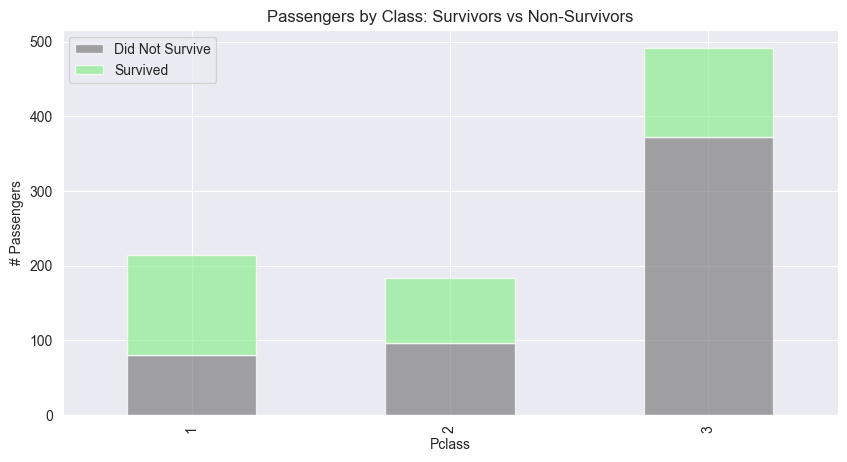

In [56]:
# Passenger class summary
print('Passenger Class Summary')

print('\n')
print(train_data.groupby(['Pclass','Survived']).Pclass.count().unstack())

# Passenger class visualization
pclass = train_data.groupby(['Pclass','Survived']).Pclass.count().unstack()
p1 = pclass.plot(kind = 'bar', stacked = True,
                   title = 'Passengers by Class: Survivors vs Non-Survivors',
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Pclass')
p1.set_ylabel('# Passengers')
p1.legend(['Did Not Survive','Survived'])
plt.show()

Passengers with Siblings or Spouse


Survived      0      1
SibSp                 
0         398.0  208.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN


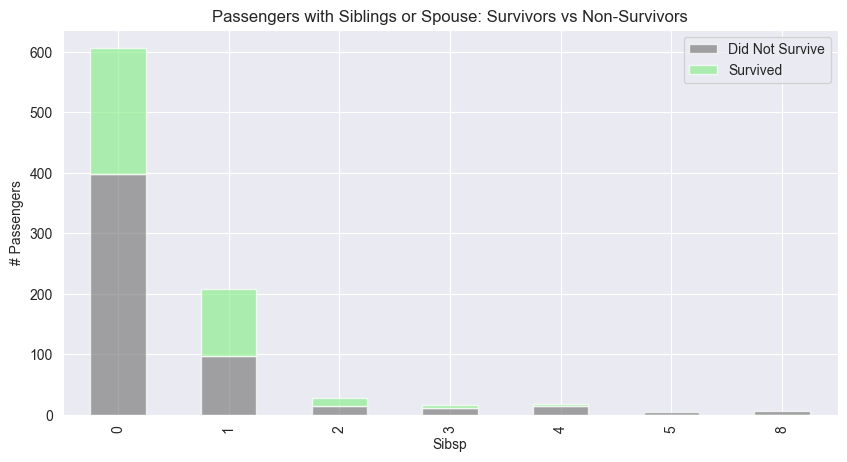

In [57]:
print('Passengers with Siblings or Spouse')
print('\n')
print(train_data.groupby(['SibSp','Survived']).SibSp.count().unstack())

sibsp = train_data.groupby(['SibSp','Survived']).SibSp.count().unstack()
p2 = sibsp.plot(kind = 'bar', stacked = True,
                   color = ['grey','lightgreen'], alpha = .70)
p2.set_title('Passengers with Siblings or Spouse: Survivors vs Non-Survivors')
p2.set_xlabel('Sibsp')
p2.set_ylabel('# Passengers')
p2.legend(['Did Not Survive','Survived'])
plt.show()

Survived      0      1
Parch                 
0         445.0  231.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN


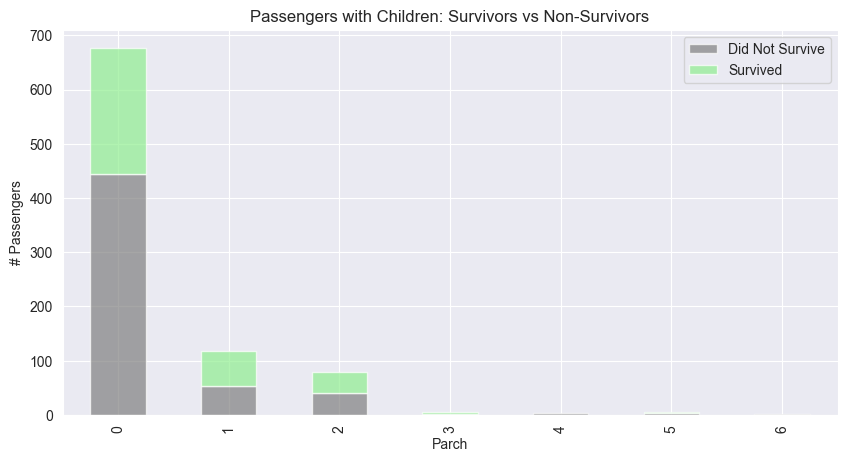

In [58]:
print(train_data.groupby(['Parch','Survived']).Parch.count().unstack())

parch = train_data.groupby(['Parch','Survived']).Parch.count().unstack()
p3 = parch.plot(kind = 'bar', stacked = True,
                   color = ['grey','lightgreen'], alpha = .70)
p3.set_title('Passengers with Children: Survivors vs Non-Survivors')
p3.set_xlabel('Parch')
p3.set_ylabel('# Passengers')
p3.legend(['Did Not Survive','Survived'])
plt.show()

* Insights sobre Pasajeros con Hijos: 


La mayoría de los pasajeros a bordo no tenía hijos.

La mayoría de los pasajeros sin hijos no sobrevivió.

Los pasajeros con uno o dos hijos sobrevivieron en la mitad de los casos.

Statistical Summary of Age and Fare


Did Not Survive
      count       mean        std  min      25%   50%   75%    max
Age   549.0  29.560109  12.778433  1.0  23.0000  25.0  37.0   74.0
Fare  549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0
--------------------------------------------------------------------------------
Survived
      count       mean        std   min       25%   50%      75%       max
Age   340.0  28.146088  13.852728  0.42  21.00000  27.0  36.0000   80.0000
Fare  340.0  48.209498  66.748773  0.00  12.44375  26.0  56.9469  512.3292


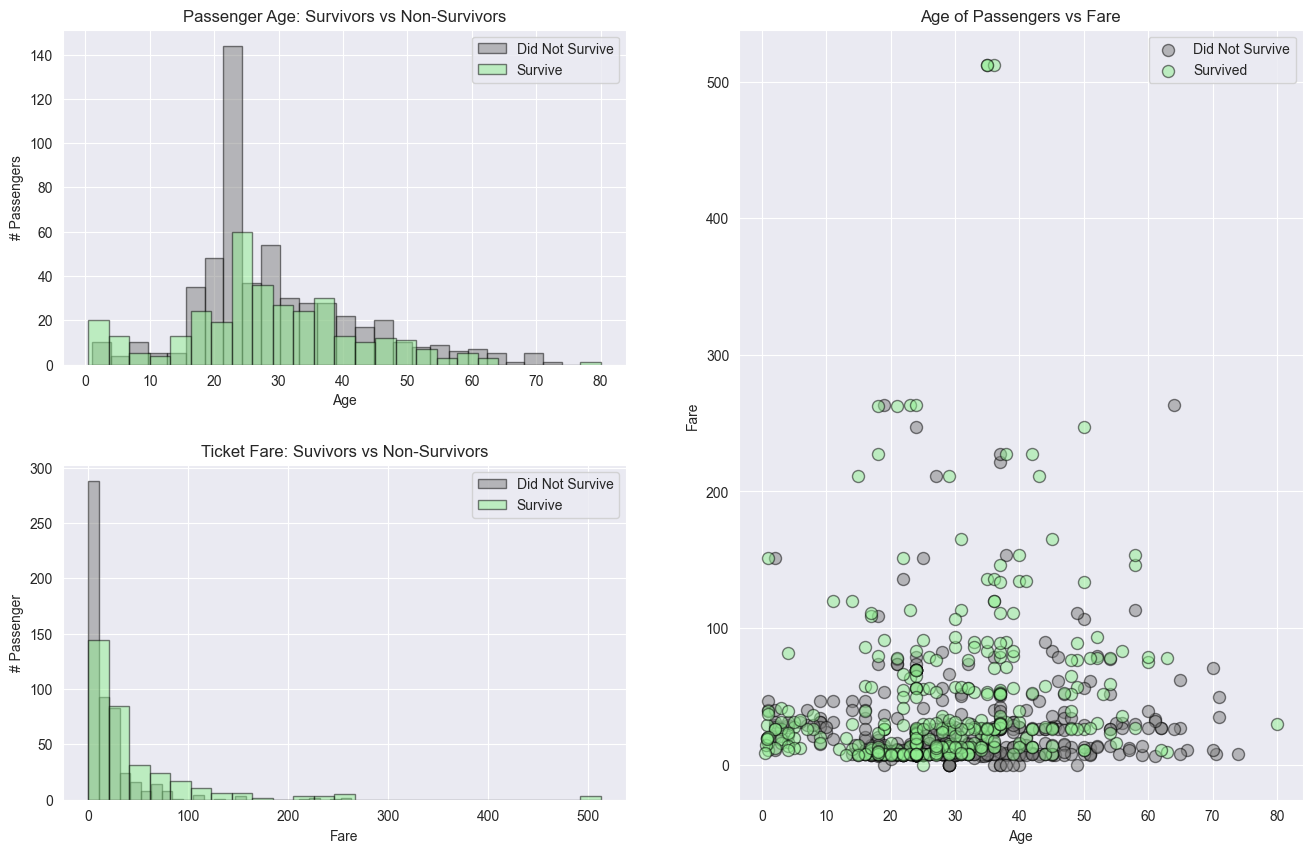

In [59]:
print('Statistical Summary of Age and Fare')
print('\n')
print('Did Not Survive')
print(train_data[train_data['Survived']==0][['Age','Fare']].describe().transpose())
print('--'*40)
print('Survived')
print(train_data[train_data['Survived']==1][['Age','Fare']].describe().transpose())
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(train_data[train_data['Survived'] ==0].Age, bins = 25, label ='Did Not Survive', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(train_data[train_data['Survived']==1].Age, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Passengers')
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(223)
ax2.hist(train_data[train_data['Survived']==0].Fare, bins = 25, label = 'Did Not Survive', alpha = .50, edgecolor ='black', color = 'grey')
ax2.hist(train_data[train_data['Survived']==1].Fare, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax2.set_title('Ticket Fare: Suvivors vs Non-Survivors')
ax2.set_xlabel('Fare')
ax2.set_ylabel('# Passenger')
ax2.legend(loc = 'upper right')

ax3 = fig.add_subplot(122)
ax3.scatter(x = train_data[train_data['Survived']==0].Age, y = train_data[train_data['Survived']==0].Fare,
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Survive')
ax3.scatter(x = train_data[train_data['Survived']==1].Age, y = train_data[train_data['Survived']==1].Fare,
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Survived')
ax3.set_xlabel('Age')
ax3.set_ylabel('Fare')
ax3.set_title('Age of Passengers vs Fare')
ax3.legend()

plt.show()

* Insights de Características Numéricas

La mayoría de los pasajeros menores de 10 años sobrevivieron.

La mayoría de las personas que pagaron más de $100 por su boleto sobrevivieron.

Hubo un menor número de personas que sobrevivieron a partir de los 40 años.

_______

## Features categóricas: 

In [60]:
train_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

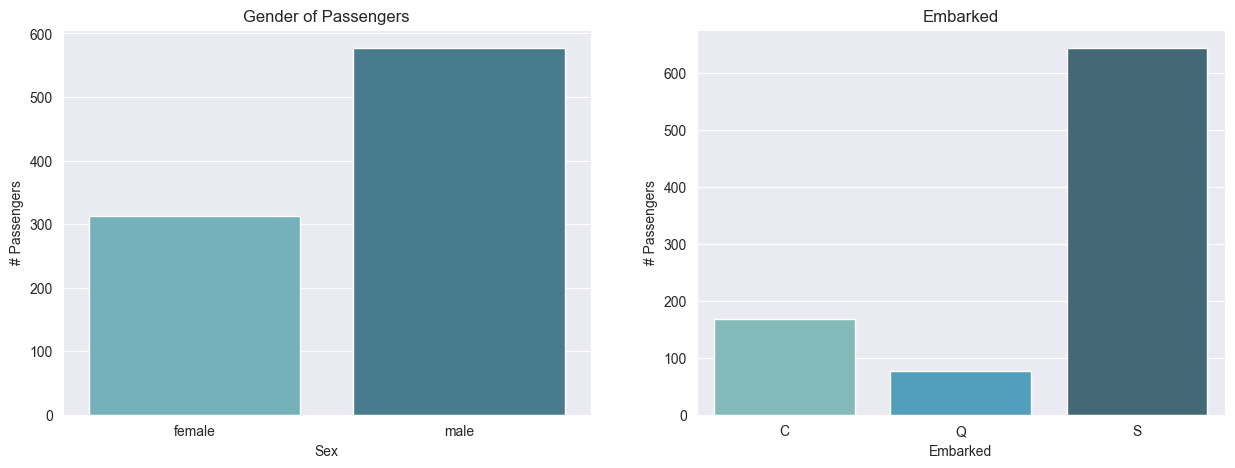

In [61]:
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (15,5))

# Plot [0]
sns.countplot(x = 'Sex', data = train_data, palette = 'GnBu_d', ax = axes[0])
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('# Passengers')
axes[0].set_title('Gender of Passengers')

# Plot [1]
sns.countplot(x = 'Embarked', data = train_data, palette = 'GnBu_d',ax = axes[1])
axes[1].set_xlabel('Embarked')
axes[1].set_ylabel('# Passengers')
axes[1].set_title('Embarked')

plt.show()

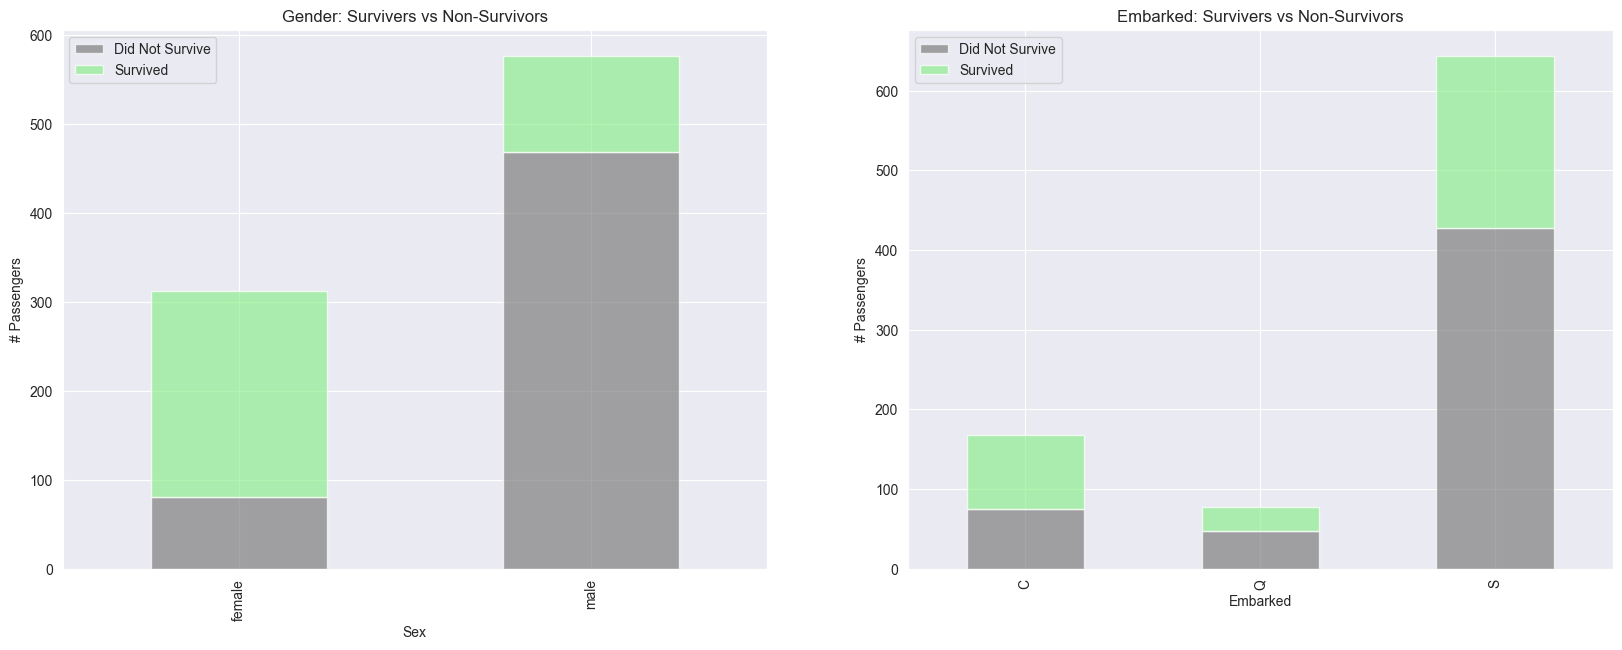

In [62]:
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (20,7))

gender = train_data.groupby(['Sex','Survived']).Sex.count().unstack()
p1 = gender.plot(kind = 'bar', stacked = True,
                   title = 'Gender: Survivers vs Non-Survivors',
                   color = ['grey','lightgreen'], alpha = .70, ax = axes[0])
p1.set_xlabel('Sex')
p1.set_ylabel('# Passengers')
p1.legend(['Did Not Survive','Survived'])


embarked = train_data.groupby(['Embarked','Survived']).Embarked.count().unstack()
p2 = embarked.plot(kind = 'bar', stacked = True,
                    title = 'Embarked: Survivers vs Non-Survivors',
                    color = ['grey','lightgreen'], alpha = .70, ax = axes[1])
p2.set_xlabel('Embarked')
p2.set_ylabel('# Passengers')
p2.legend(['Did Not Survive','Survived'])

plt.show()

__________

## Data processing: 


In [63]:
train_data.shape

(889, 8)

In [64]:
train_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
sex = pd.get_dummies(train_data['Sex'], drop_first = True) # drop_first prevents multi-collinearity
embarked = pd.get_dummies(train_data['Embarked'], drop_first = True)

In [66]:
embarked

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [67]:
# Add new dummy columns to data frame
train_data = pd.concat([train_data, sex, embarked], axis = 1)
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False


In [68]:
# Drop unecessary columns
train_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

# Shape of train data
print('train_data shape',train_data.shape)

# Confirm changes
train_data.head()

train_data shape (889, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [78]:
x = train_data.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = train_data['Survived'] # y is the column we're trying to predict

# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101, stratify=y)

In [81]:
train_data.shape

(889, 9)

In [82]:
x_train.shape, y_train.shape

((711, 8), (711,))

In [83]:
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
720,2,6.0,0,1,33.0000,False,False,True
307,1,17.0,1,0,108.9000,False,False,False
141,3,22.0,0,0,7.7500,False,False,True
593,3,24.0,0,2,7.7500,False,True,False
243,3,22.0,0,0,7.1250,True,False,True
...,...,...,...,...,...,...,...,...
358,3,24.0,0,0,7.8792,False,True,False
142,3,24.0,1,0,15.8500,False,False,True
546,2,19.0,1,0,26.0000,False,False,True
678,3,43.0,1,6,46.9000,False,False,True


In [84]:
y_train

720    1
307    1
141    1
593    0
243    0
      ..
358    1
142    1
546    1
678    0
880    1
Name: Survived, Length: 711, dtype: int64

In [85]:
x_test.shape, y_test.shape

((178, 8), (178,))

In [86]:
x_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
100,3,28.0,0,0,7.8958,False,False,True
229,3,24.0,3,1,25.4667,False,False,True
31,1,37.0,1,0,146.5208,False,False,False
684,2,60.0,1,1,39.0000,True,False,True
851,3,74.0,0,0,7.7750,True,False,True
...,...,...,...,...,...,...,...,...
763,1,36.0,1,2,120.0000,False,False,True
859,3,24.0,0,0,7.2292,True,False,False
447,1,34.0,0,0,26.5500,True,False,True
596,2,29.0,0,0,33.0000,False,False,True


___________

## Model


In [ ]:
# Fit
# Import model
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression()

In [88]:
dir(lreg)

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual'

In [89]:
lreg.feature_names_in_

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'],
      dtype=object)

In [90]:
lreg.get_params(())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [91]:
y_pred_lreg = lreg.predict(x_test)

In [92]:
y_pred_lreg

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1])

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


Logistic Regression


Confusion Matrix
[[97 13]
 [20 48]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.74        68

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178

--------------------------------------------------------------------------------
Accuracy 81.46 %


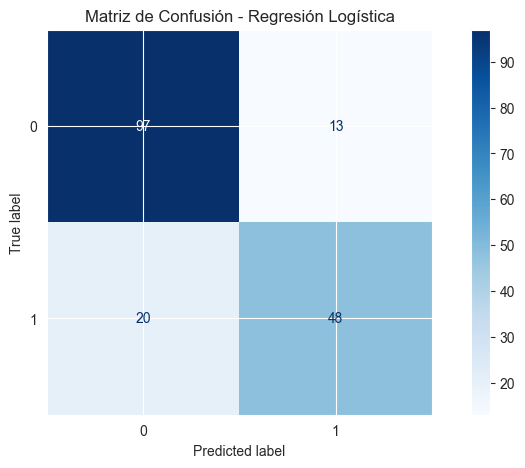

In [94]:
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, y_pred_lreg)
print(conf_matrix)
print('--' * 40)

# Reporte de Clasificación
print('Classification Report')
print(classification_report(y_test, y_pred_lreg))

# Precisión
print('--' * 40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100, 2)
print('Accuracy', logreg_accuracy, '%')

# Graficar la Matriz de Confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

| Métrica             | Clase 0        | Clase 1        | Explicación                                                                                                                            |
|---------------------|----------------|----------------|----------------------------------------------------------------------------------------------------------------------------------------|
| **Precisión**       | 83%            | 79%            | Cuando el modelo clasifica un pasajero como de la clase 1 (por ejemplo, sobreviviente), tiene razón en el 79% de los casos. Para la clase 0 (no sobrevivientes), tiene razón en el 83% de los casos. Esto indica que el modelo es mejor al identificar pasajeros que no sobrevivieron. |
| **Recuperación**    | 88%            | 71%            | De todos los pasajeros que realmente eran de la clase 0, el modelo identifica correctamente el 88%. Sin embargo, solo identifica el 71% de los pasajeros que realmente eran de la clase 1. Esto significa que se le escapan muchos pasajeros de la clase 1. |
| **F1-Score**        | 85%            | 74%            | Es una métrica que combina precisión y recuperación. La clase 0 tiene un buen balance (85%), pero la clase 1 muestra un espacio significativo para la mejora (74%). |
| **Soporte**         | 110            | 68             | Esto indica cuántos ejemplos hay en cada clase. Hay 110 pasajeros que no sobrevivieron (clase 0) y 68 que sí sobrevivieron (clase 1). Un mayor número de ejemplos de clase 1 podría influir en el rendimiento del modelo. |
| **Precisión Global**| 81%            | -              | En general, el modelo toma decisiones correctas el 81% del tiempo. Este es un porcentaje razonable, aunque todavía hay oportunidades para mejorar el rendimiento.                    |
| **Promedio Macro**  | 81%            | 79%            | Un promedio simple de las métricas para ambas clases, sin tener en cuenta cuántos ejemplos hay de cada una. Indica que el modelo tiene un rendimiento bastante equilibrado en general. |
| **Promedio Ponderado** | 81%        | 81%            | Este promedio considera cuántos ejemplos hay de cada clase. Esto sugiere que el modelo tiene un rendimiento equilibrado general al tener en cuenta la distribución de las clases. |

### Resumen:

- **Buena Identificación de No Sobrevivientes (Clase 0)**: El modelo es bastante efectivo en identificar a los pasajeros que no sobrevivieron, acertando en un 88% de los casos. 
- **Mejorar la Identificación de Sobrevivientes (Clase 1)**: El modelo tiene dificultades para identificar a los pasajeros que sobrevivieron, acertando en solo el 71% de los casos. Esto significa que muchos sobrevivientes no fueron detectados.
- **Oportunidades de Mejora**: Se pueden implementar enfoques adicionales para mejorar la identificación de los sobrevivientes. Esto incluye la posibilidad de ajustar los parámetros del modelo, emplear diferentes técnicas de modelado o incluso aumentar la cantidad de datos disponibles para entrenar el modelo de manera más eficaz.


____________

### K-NEAREST NEIGHBORS


K-Nearest Neighbors (KNN), o "K vecinos más cercanos", es un método que se utiliza para clasificar nuevos datos. Imagina que tienes un conjunto de datos conocido, y ahora quieres clasificar un nuevo punto de datos utilizando lo que ya sabes. KNN lo hace a través de dos pasos sencillos:

Encontrar a los K vecinos más cercanos: Esto significa que el algoritmo buscará los K puntos de datos en tu conjunto que están más cerca del nuevo punto que quieres clasificar. Aquí, "K" es un número que eliges, como 3 o 5.

Votar por la clasificación: Una vez que se han encontrado los vecinos más cercanos, cada uno de ellos "vota" por qué clase o categoría cree que pertenece el nuevo dato. Por ejemplo, si 3 de los 5 vecinos más cercanos son "manzanas" y 2 son "naranjas", el nuevo punto se clasifica como "manzana".

#### ¿Por qué es importante estandarizar los datos?

Cuando se utiliza KNN, es importante que todas las variables (o características) de los datos estén en la misma escala. Esto se debe a que KNN utiliza la "distancia" para encontrar a los vecinos más cercanos, y si tienes una característica que tiene un rango mucho más grande que otra (por ejemplo, la altura en centímetros y el peso en kilogramos), la característica con el rango más grande podría influir más en la distancia que la otra.

* Ejemplo:

Imagina que estás clasificando frutas y tienes dos características: el peso (en gramos) y el color (en un rango del 1 al 10). Si el peso varía entre 100 y 1000 gramos y el color solo entre 1 y 10, el peso tendrá un impacto mucho mayor en la distancia calculada. Esto podría llevar a decisiones incorrectas sobre la clasificación de las frutas. Por eso, es fundamental "estandarizar" los datos, lo que significa convertir todas las características a una escala similar, para que cada una tenga el mismo peso en la clasificación.




In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create instance of standard scaler
scaler = StandardScaler()

# Fit scaler object to feature columns
scaler.fit(train_data.drop('Survived', axis = 1)) # Everything but target variable

# Use scaler object to do a transform columns
scaled_features = scaler.transform(train_data.drop('Survived', axis = 1)) # performs the standardization by centering and scaling
scaled_features

In [ ]:
scaled_features.shape

In [ ]:
# Use scaled features variable to re-create a features dataframe
df_feat = pd.DataFrame(scaled_features, columns = train_data.columns[:-1])

In [ ]:
from sklearn.model_selection import train_test_split

# Create matrix of features
x = df_feat

# Create target variable
y = train_data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [ ]:
# Import model
from sklearn.neighbors import KNeighborsClassifier

# Create instance of model
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit to training data
knn.fit(x_train,y_train)

In [ ]:
# Predict
y_pred_knn = knn.predict(x_test)

In [ ]:
print('K-Nearest Neighbors (KNN)')
print('k = 1')
print('\n')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Imprimir la matriz de confusión
print('Confusion Matrix')
print(conf_matrix)

# Mostrar el reporte de clasificación
print('--' * 40)
print('Classification Report')
print(classification_report(y_test, y_pred_knn))

# Precisión
print('--' * 40)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn) * 100, 1)
print('Accuracy', knn_accuracy, '%')

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Clase 0', 'Clase 1'])  # Cambia los nombres de las clases según sea necesario
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - KNN')
plt.show()

Elegir un valor adecuado para "k" es crucial, ya que un "k" demasiado pequeño puede hacer que el modelo se sobreajuste a los datos (es decir, que sea muy sensible al ruido en los datos), mientras que un "k" demasiado grande puede hacer que el modelo no capture correctamente las características de los datos.

### Método del "Codo":

La mejor forma de encontrar el valor óptimo de "k" es mediante el método del "Codo". Este método implica lo siguiente:

1 - Probar diferentes valores de k: Se entrena el modelo varias veces, usando diversos valores de k (por ejemplo, k=1, k=2, k=3, hasta k=n).

2 - Calcular la tasa de error: Para cada valor de k, se calcula la tasa de error del modelo (la cantidad de predicciones incorrectas).

3 - Graficar los resultados: Se hacen gráficos que muestran la tasa de error en función de los diferentes valores de k.

4 - Buscar el "codo": Al observar el gráfico, se puede identificar un punto donde la disminución de la tasa de error se desacelera, formando una especie de "codo". Este punto indica el valor de k que proporciona el mejor equilibrio entre precisión y complejidad del modelo.

El objetivo es seleccionar el k que tiene la tasa de error más baja, lo que significa que el modelo es más preciso y generaliza mejor a nuevos datos.



In [ ]:
# Function
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o',
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 13)

# Fit new KNN on training data
knn.fit(x_train, y_train)

In [ ]:
y_pred_knn_op = knn.predict(x_test)

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred_knn_op)

# Imprimir la matriz de confusión
print('Confusion Matrix')
print(conf_matrix)

# Mostrar el reporte de clasificación
print('--' * 40)
print('Classification Report')
print(classification_report(y_test, y_pred_knn_op))

# Precisión
print('--' * 40)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn_op) * 100, 1)
print('Accuracy', knn_accuracy, '%')

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Clase 0', 'Clase 1'])  # Cambia los nombres de las clases según sea necesario
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - KNN')
plt.show()